---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Investigación Operativa I4051__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

# Filas de espera M/M/S

In [62]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

## Funciones de métricas

### Factor de tráfico ($\rho$)

$\rho = \frac{\lambda}{S*\mu}$

In [2]:
# Factor de tráfico.
def calcular_rho(lambd, mu, s):
    
    return lambd / (s * mu)

### Probabilidad de sistema ocioso ($P_0$)

$P_0 = \frac{1}{\sum_{i=0}^{M-1} \frac{\frac{\lambda}{\mu}^i}{i!} + \frac{\frac{\lambda}{\mu}^M}{M!(1-\rho)}} $

In [3]:
# Probabilidad de sistema ocioso.
def calcular_p0(lambd, mu, s):
    
    # Calculamos a sumatoria del numerador como la suma de un array.
    array = [((lambd/mu)**i)/factorial(i) for i in range(0, s-1)]
    sumatoria = sum(array)
    
    # Calculamos factor de tráfico.
    rho = calcular_rho(lambd, mu, s)
    
    # Calculamos p0.
    p0 = 1 / ( sumatoria + (lambd/mu)**s / (factorial(s) * (1 - rho)))
    
    # Retornamos p0.
    return p0

### Cantidad media de personas en la fila ($L_q$)

$L_q = \frac{P_0(\frac{\lambda}{\mu}^m)\rho}{M!(1-\rho)^2}$

In [4]:
# Cantidad media de personas en la fila:
def calcular_lq(lambd, mu, s):
    
    # Calculamos p0.
    p0 = calcular_p0(lambd, mu, s)
    
    # Calculamos rho.
    rho = calcular_rho(lambd, mu, s)
    
    # Calculamos Lq.
    Lq = ((lambd/mu)**s) * rho * p0 / (factorial(s) * ((1 - rho))**2)
    
    # Retornamos Lq.
    return Lq

### Tiempo de espera medio en la fila ($W_q$)

$W_q = \frac{L_q}{\lambda}$

In [5]:
## Tiempo medio de espera en la fila:
def calcular_wq(lambd, mu, s):
    
    # Calculamos Lq.
    Lq = calcular_lq(lambd, mu, s)
    
    # Calculamos wq
    Wq = Lq / lambd
    
    return Wq

### Cantidad media de personas en el sistema ($W_s$)

$W_s = L_q + \frac{\lambda}{\mu}$

In [6]:
## Cantidad media de personas en el sistema:
def calcular_ls(lambd, mu, s):
    
    # Calculamos Lq.
    Lq = calcular_lq(lambd, mu, s)
    
    # Calculamos Ls.
    Ls = Lq + (lambd / mu)
    
    # Retornamos Ls.
    return Ls

### Cantidad de tiempo medio en el sistema ($W_s$)

$W_s = W_q + \frac{1}{\mu}$

In [7]:
## Tiempo medio en el sistema:
def calcular_ws(lambd, mu, s):
    
    # Calculamos Wq.
    Wq = calcular_wq(lambd, mu, s)
    
    # Calculamos Ws.
    Ws = Wq + 1 / mu
    
    # Retornamos Ws.
    return Ws

## Funciones de costos
### Costo de oportunidad ($C_O$)
$C_O = W_s * \lambda * e$

In [18]:
def calcular_costo_oportunidad(lambd, e, s):
    
    # Calculamos Ws.
    Ws = calcular_ws(lambd, mu, s)
    
    # Calculamos costo de oportunidad.
    Co = Ws * lambd * e
    
    # Retornamos costo de oportunidad.
    return Co

### Costo de operacion ($C_E$)
$C_E = M * C_m$

In [21]:
def calcular_costo_operacion(s, Cm):

    # Calculamos costo de operación.
    Ce = s * Cm
    
    # Retornamos costo de operación.
    return Ce

## Ejemplo:

Una línea automatizada tiene tres tornos CNC idénticos.
La materia forma una única fila de espera al pie de las 3 máquinas esperando ser procesada.
Las cantidades que arriban y se procesan siguen una distribución de Poisson.
Además se sabe que la tasa de procesamiento de los tornos es de 𝜇=6 u/hora, y la materia prima llega con una tasa de 𝜆=16 𝑢/ℎ𝑜𝑟𝑎.

Si la ganancia por unidad despachada es de 1100 usd y costo de operación de cada CNC es de 300 usd ¿Es necesario invertir en más CNC o vender alguno?

In [22]:
# Datos:
lambd = 16
mu = 6

e = 1100
Cm = 300

In [30]:
servidores = range(1, 8)
print(list(servidores))

[1, 2, 3, 4, 5, 6, 7]


In [31]:
for i in servidores:
    
    print(f'{i} CNC')
    
    # Factor de tráfico.
    rho = calcular_rho(lambd, mu, i)
    
    print(f'Factor de tráfico: {rho}')
    
    if rho > 1:
        print('Sistema inestable\n')
    
    else:
        # Tiempo en el sistema.
        Ws = calcular_ws(lambd, mu, i)

        # Costo de oportunidad.
        Co = calcular_costo_oportunidad(lambd, e, i)

        # Costo de operación.
        Ce = calcular_costo_operacion(i, Cm)
        
        print(f'Tiempo en el sistema: {Ws}')
        print(f'Costo de oportunidad: {Co}')
        print(f'Costo de operación: {Ce}')
        print(f'Costo total: {Co + Ce}\n')

1 CNC
Factor de tráfico: 2.6666666666666665
Sistema inestable

2 CNC
Factor de tráfico: 1.3333333333333333
Sistema inestable

3 CNC
Factor de tráfico: 0.8888888888888888
Tiempo en el sistema: 0.6095732410611301
Costo de oportunidad: 10728.48904267589
Costo de operación: 900
Costo total: 11628.48904267589

4 CNC
Factor de tráfico: 0.6666666666666666
Tiempo en el sistema: 0.22500759647523547
Costo de oportunidad: 3960.133697964144
Costo de operación: 1200
Costo total: 5160.133697964144

5 CNC
Factor de tráfico: 0.5333333333333333
Tiempo en el sistema: 0.18011389875617478
Costo de oportunidad: 3170.0046181086764
Costo de operación: 1500
Costo total: 4670.004618108676

6 CNC
Factor de tráfico: 0.4444444444444444
Tiempo en el sistema: 0.17002391988273655
Costo de oportunidad: 2992.420989936163
Costo de operación: 1800
Costo total: 4792.420989936163

7 CNC
Factor de tráfico: 0.38095238095238093
Tiempo en el sistema: 0.16751582632499548
Costo de oportunidad: 2948.2785433199206
Costo de operac

## Plots

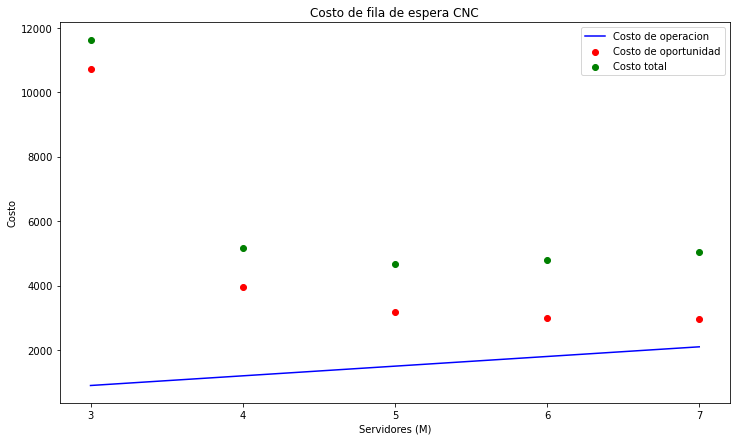

In [74]:
## Costo de oportunidad.
Co = [calcular_costo_oportunidad(lambd, e, i) for i in servidores[2:]]

## Costo de operación.
Ce = [calcular_costo_operacion(i, Cm) for i in servidores[2:]]

## Costo total.
Ct = [Ce_i + Co_i for Ce_i, Co_i in zip(Ce, Co)]

## Plot
plt.subplots(figsize=(12, 7))
plt.scatter(servidores[2:], Co, color='r', label='Costo de oportunidad')
plt.plot(servidores[2:], Ce, color='b', label='Costo de operacion')
plt.scatter(servidores[2:], Ct, color='g', label='Costo total')
plt.xticks(range(3, 8, 1))

plt.xlabel('Servidores (M)')
plt.ylabel('Costo')
plt.title('Costo de fila de espera CNC')
plt.legend()
plt.show()

[3, 4, 5, 6, 7]